In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json
import re
import Twitter_Credentials as tc

In [2]:
import tweepy
from tweepy import OAuthHandler
import spacy
from textblob import TextBlob

In [3]:
auth = OAuthHandler(tc.consumer_key,tc.consumer_secret_key)
auth.set_access_token(tc.access_key,tc.access_secret_key)

api = tweepy.API(auth,proxy='https://webproxyjb.fpl.com:8080')

In [4]:
keywords = ['Nextera Energy','Florida Power and Light','Renewable Energy','Wind Farm','Solar Farm','Solar Energy'\
         ,'Wind Energy','Alternative Energy']

In [5]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])\
                            |(\w+:\/\/\S+)"," ",tweet).split())

In [6]:
def tweet_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    polarity_score = analysis.sentiment.polarity
    if polarity_score > 0:
        return ['positive', polarity_score]
    elif polarity_score == 0:
        return ['neutral',polarity_score]
    else:
        return ['negative',polarity_score]

In [7]:
def get_tweets(keywords):
    tweets=[]
    
    try:
        for i in range(len(keywords)):
            results = api.search(q=keywords[i])
            for tweet in results:
                try:
                    if tweet.retweeted_status:
                        continue
                        
                except AttributeError:
                        parsed_tweet = {}
                        parsed_tweet['text'] = tweet.text
                        parsed_tweet['sentiment'] = tweet_sentiment(tweet.text)[0]
                        parsed_tweet['polarity_score'] = tweet_sentiment(tweet.text)[1]
                        parsed_tweet['geo_loc'] = tweet.coordinates
                        parsed_tweet['tweet_date'] = tweet.created_at
                        tweets.append(parsed_tweet)

        return tweets
    
    except tweepy.TweepError as e:
        print('Error : ' + str(e))

                

In [8]:
df = pd.DataFrame(get_tweets(keywords))

In [9]:
df.head()

,geo_loc,polarity_score,sentiment,text,tweet_date
0,None,0.600,positive,Nextera Energy $NEE Stock Value Rose While Adv...,2019-03-29 13:00:12
1,None,0.075,positive,"First Solar, NextEra Energy Resources Celebrat...",2019-03-29 12:59:16
2,None,0.000,neutral,Weiss Asset Management LP Raised Nextera Energ...,2019-03-29 12:51:43
3,None,0.000,neutral,Bank Of Montreal Boosted Its Holding in Carlyl...,2019-03-29 12:46:32
4,None,0.000,neutral,@carloslcurbelo @mattgaetz Gaetz doesn’t know ...,2019-03-29 12:43:45


In [10]:
df.shape

(84, 5)

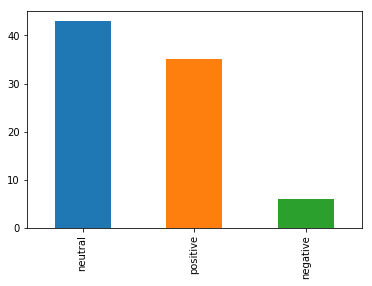

In [11]:
df['sentiment'].value_counts().plot(kind='bar')